<a href="https://colab.research.google.com/github/MathBioCU/WSINDy4Weather/blob/main/get_stratified_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See [github.com/sciserver/giverny/blob/master/DEMO_Getdata_local.ipynb](https://github.com/sciserver/giverny/blob/master/DEMO_Getdata_local.ipynb)

## Init and Install

In [ ]:
"""
install the upgraded givernylocal package.
    - n.b. this only needs to be run once.
"""
#!pip install --upgrade givernylocal
!pip install givernylocal

In [1]:
# May have to update pandas
import pandas
pandas.__version__

'1.5.3'

In [2]:
"""
instantiate dataset
"""
from givernylocal.turbulence_dataset import *
from givernylocal.turbulence_toolkit import *

#auth_token = 'edu.jhu.pha.turbulence.testing-201406'
auth_token = 'INSERT YOUR PERSONAL AUTH TOKEN HERE'
dataset_title = 'sabl2048high'
output_path = './giverny_output'

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

## Info

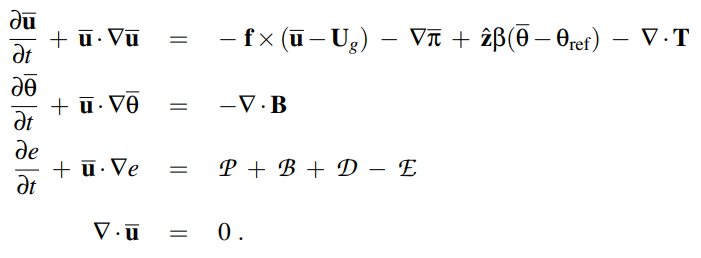

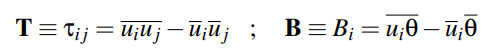

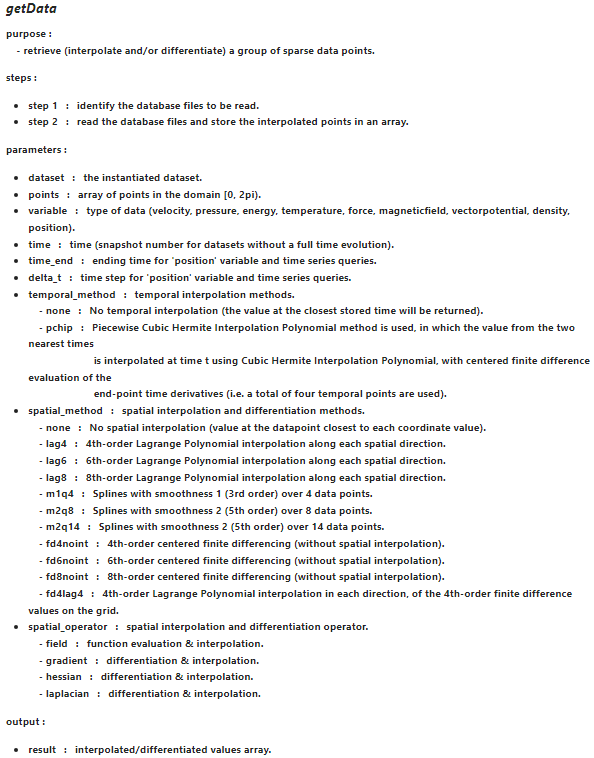

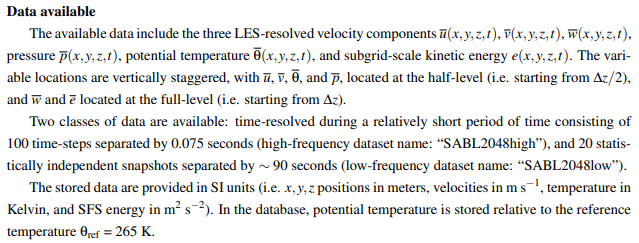

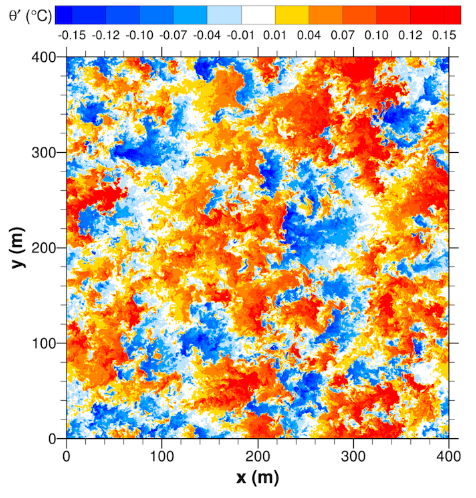

## Velocity ($\boldsymbol{u}$, $\nabla\boldsymbol{u}$) and Temperature ($\theta$, $\nabla\theta$, $\nabla p$)

In [3]:
"""
initialize getData parameters (except time and points)
"""
#variable = 'velocity'
variable = 'temperature'
#variable = 'pressure'

temporal_method = 'none'

spatial_method = 'lag8'
spatial_operator = 'field'

#spatial_method = 'fd4lag4'
#spatial_operator = 'gradient'

"""
example point distributions (2D plane, 3D box, random, time series) are provided below...
"""

'\nexample point distributions (2D plane, 3D box, random, time series) are provided below...\n'

$400 \ \text{m}^3$ domain

In [ ]:
import numpy as np

# Set the delta value
delta = 1

# Create arrays for x, y, and z values spanning from 0 to 10
# Measured in meters
x = np.arange(31, 61 + delta, delta)
y = np.arange(0, 30 + delta, delta)
z = np.arange(1, 1 + delta, delta) # Fix z = z0 = 1 m

print(f'(Nx, Ny, Nz)={x.shape,y.shape,z.shape}')

# Use np.meshgrid to generate all combinations of x, y, and z
X, Y, Z = np.meshgrid(x, y, z)

# Stack the arrays along the last axis and reshape it to get a list of points (x, y, z)
points = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

print(points.shape)

(Nx, Ny, Nz)=((31,), (31,), (1,))
(961, 3)


In [ ]:
points.shape, points

((961, 3),
 array([[31,  0,  1],
        [32,  0,  1],
        [33,  0,  1],
        ...,
        [59, 30,  1],
        [60, 30,  1],
        [61, 30,  1]]))

In [ ]:
"""
time series demo point(s)
    - time : the start time of the time series (snapshot number for datasets without a full time evolution).
    - time_end : the end time of the time series (snapshot number for datasets without a full time evolution).
    - delta_t : time step.
    - points : the points array.
"""
# Time in seconds?
time = 0
time_end = 100*0.075 - 0.075
delta_t = 0.075
option = [time_end, delta_t]

# Points (x,y,z) in meters?
#points = np.array([[0, 0, 0.1], [0, 0, 0.2]], dtype = np.float64)

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
# (Auto-quits after 60s of loading...)
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points, option)


-----
getData is processing...

total time elapsed = 14.163 seconds (0.236 minutes)

query completed successfully.
-----


In [ ]:
print(result[0])
print(f'number of snapshots = {len(result)}')

            θ
0   -0.438053
1   -0.443399
2   -0.404781
3   -0.421612
4   -0.391335
..        ...
956 -0.499415
957 -0.497389
958 -0.473349
959 -0.457119
960 -0.349294

[961 rows x 1 columns]
number of snapshots = 100


In [ ]:
"""
write the interpolation results to a tab-separated value (tsv) file
"""
output_filename = 'turbulence-interpolation'

"""
use the tsv writing gizmo.
"""
# write the tsv output file.
write_interpolation_tsv_file(dataset, points, result, output_filename)

writing the interpolation .tsv file...

file written successfully.
-----


## TSV Files

In [ ]:
# Access your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directories
%cd /content/drive/My Drive/WSINDy/JHTDB/geophysical

Mounted at /content/drive
/content/drive/My Drive/WSINDy/JHTDB/geophysical


In [ ]:
!pwd
!ls

/content/drive/My Drive/WSINDy/JHTDB/geophysical
gradp_Q1.tsv  gradT_Q1.tsv  gradu_Q1.tsv  temp_Q1.tsv  velocity_Q1.tsv
gradp_Q2.tsv  gradT_Q2.tsv  gradu_Q2.tsv  temp_Q2.tsv  velocity_Q2.tsv
gradp_Q3.tsv  gradT_Q3.tsv  gradu_Q3.tsv  temp_Q3.tsv  velocity_Q3.tsv
gradp_Q4.tsv  gradT_Q4.tsv  gradu_Q4.tsv  temp_Q4.tsv  velocity_Q4.tsv


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Shapes (per file)
(Nx, Ny, Nt) = (31, 31, 100)

x = np.arange(0, 2*Nx, 1)
y = np.arange(0, 2*Ny, 1)

In [ ]:
# TEST TSV FILE

# Read in the tsv files (skip headers)
df1 = pd.read_csv('temp_Q1.tsv', sep='\t', skiprows=1)
df2 = pd.read_csv('temp_Q2.tsv', sep='\t', skiprows=1)
df3 = pd.read_csv('temp_Q3.tsv', sep='\t', skiprows=1)
df4 = pd.read_csv('temp_Q4.tsv', sep='\t', skiprows=1)

# Extract relevant data columns and convert to a NumPy array
T1 = df1[['θ']].to_numpy().reshape(Nt, Nx, Ny).transpose()
T2 = df2[['θ']].to_numpy().reshape(Nt, Nx, Ny).transpose()
T3 = df3[['θ']].to_numpy().reshape(Nt, Nx, Ny).transpose()
T4 = df4[['θ']].to_numpy().reshape(Nt, Nx, Ny).transpose()

# Combine
T_top = np.concatenate((T1, T2), axis=0)
T_bot = np.concatenate((T4, T3), axis=0)
T = np.concatenate((T_top, T_bot), axis=1)

# Check the output formats
print(f'Imported array... shape: {T1.shape}')
print(f'Combined array... shape: {T.shape}')

Imported array... shape: (31, 31, 100)
Combined array... shape: (62, 62, 100)


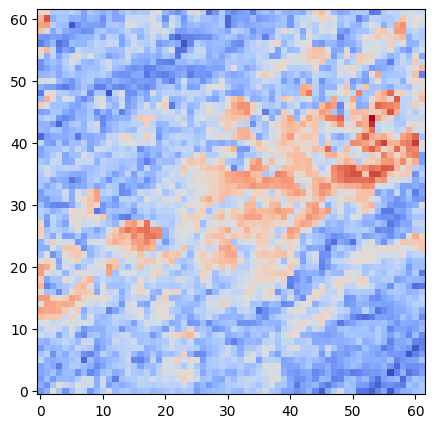

In [ ]:
# Plot
X, Y = np.meshgrid(x, y, indexing='ij')
thyme = 0

plt.figure(figsize=(5,5))
plt.pcolormesh(X, Y, T[:,:,thyme], cmap='coolwarm')

In [ ]:
# # EXPORT AS CSV

# # Reshape the 3D array to 2D, keeping the last dimension intact
# T_flattened = T.reshape(2*Nx*2*Ny, Nt)

# # Create a DataFrame and export to CSV
# df = pd.DataFrame(T_flattened)
# df.to_csv('temp.csv', index=False, header=False)

In [ ]:
# # MAKE A MOVIE

# import matplotlib.animation as animation

# # Set up the figure and axis
# fig, ax = plt.subplots(figsize=(5, 4))

# # Initialize the plot (using the first time slice for initialization)
# c = ax.pcolormesh(X, Y, T[:, :, 0], cmap='coolwarm', shading='auto')
# ax.set_title(f'Temperature, $t=${thyme}')
# plt.colorbar(c, ax=ax)

# # Update function for the animation
# def update(thyme):
#     ax.clear()  # Clear the current plot
#     c = ax.pcolormesh(X, Y, T[:,:,thyme], cmap='RdBu_r', shading='auto')
#     ax.set_title(f'Temperature, $t=${thyme}')
#     c.set_clim(vmin=np.min(T[:,:,thyme]), vmax=np.max(T[:,:,thyme]))
#     return c

# # Create the animation (frames are the range of time steps)
# ani = animation.FuncAnimation(fig, update, frames=T.shape[2], interval=200)

# # Save the animation as a video file (optional)
# ani.save('temperature_movie.mp4', writer='ffmpeg', fps=20, dpi=400)

In [ ]:
# VERTICAL GRADIENTS

# Read in the tsv files (skip headers)
df1 = pd.read_csv('gradT_Q1.tsv', sep='\t', skiprows=1)
df2 = pd.read_csv('gradT_Q2.tsv', sep='\t', skiprows=1)
df3 = pd.read_csv('gradT_Q3.tsv', sep='\t', skiprows=1)
df4 = pd.read_csv('gradT_Q4.tsv', sep='\t', skiprows=1)

# Extract relevant data columns and convert to a NumPy array
T1 = df1[['dθdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
T2 = df2[['dθdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
T3 = df3[['dθdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
T4 = df4[['dθdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()

# Combine
T_top = np.concatenate((T1, T2), axis=0)
T_bot = np.concatenate((T4, T3), axis=0)
T = np.concatenate((T_top, T_bot), axis=1)

# Check the output formats
print(f'Imported array... shape: {T1.shape}')
print(f'Combined array... shape: {T.shape}')

Imported array... shape: (31, 31, 100)
Combined array... shape: (62, 62, 100)


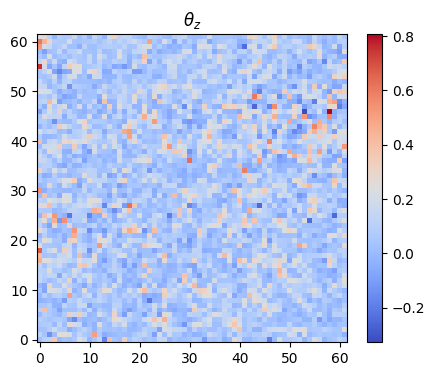

In [ ]:
# Plot
X, Y = np.meshgrid(x, y, indexing='ij')
thyme = 0

plt.figure(figsize=(5,4))
pcm = plt.pcolormesh(X, Y, T[:,:,thyme], cmap='coolwarm')
plt.title('$\\theta_z$')
plt.colorbar(pcm)

In [ ]:
# # EXPORT AS CSV

# # Reshape the 3D array to 2D, keeping the last dimension intact
# T_flattened = T.reshape(2*Nx*2*Ny, Nt)

# # Create a DataFrame and export to CSV
# df = pd.DataFrame(T_flattened)
# df.to_csv('temp_z.csv', index=False, header=False)

In [ ]:
# # PRESSURE GRADIENTS

# # Read in the tsv files (skip headers)
# df1 = pd.read_csv('gradp_Q1.tsv', sep='\t', skiprows=1)
# df2 = pd.read_csv('gradp_Q2.tsv', sep='\t', skiprows=1)
# df3 = pd.read_csv('gradp_Q3.tsv', sep='\t', skiprows=1)
# df4 = pd.read_csv('gradp_Q4.tsv', sep='\t', skiprows=1)

# # Extract relevant data columns and convert to a NumPy array
# P1 = df1[['dpdx']].to_numpy().reshape(Nt, Nx, Ny).transpose()
# P2 = df2[['dpdx']].to_numpy().reshape(Nt, Nx, Ny).transpose()
# P3 = df3[['dpdx']].to_numpy().reshape(Nt, Nx, Ny).transpose()
# P4 = df4[['dpdx']].to_numpy().reshape(Nt, Nx, Ny).transpose()

# # Combine
# P_top = np.concatenate((P1, P2), axis=0)
# P_bot = np.concatenate((P4, P3), axis=0)
# P = np.concatenate((P_top, P_bot), axis=1)

# # Check the output formats
# print(f'Imported array... shape: {P1.shape}')
# print(f'Combined array... shape: {P.shape}')

# # EXPORT AS CSV

# # Reshape the 3D array to 2D, keeping the last dimension intact
# P_flattened = P.reshape(2*Nx*2*Ny, Nt)

# # Create a DataFrame and export to CSV
# df = pd.DataFrame(P_flattened)
# df.to_csv('p_x.csv', index=False, header=False)

Imported array... shape: (31, 31, 100)
Combined array... shape: (62, 62, 100)


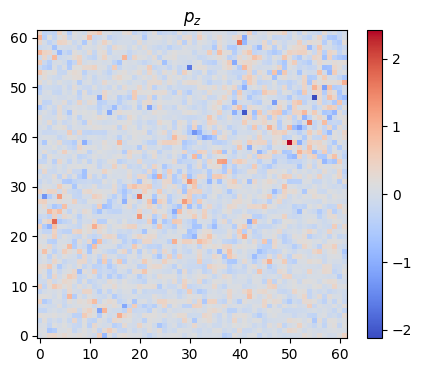

In [ ]:
# # Plot
# X, Y = np.meshgrid(x, y, indexing='ij')
# thyme = 0

# plt.figure(figsize=(5,4))
# pcm = plt.pcolormesh(X, Y, P[:,:,thyme], cmap='coolwarm')
# plt.title('$p_z$')
# plt.colorbar(pcm)

In [ ]:
# VELOCITY

# Read in the tsv files (skip headers)
df1 = pd.read_csv('velocity_Q1.tsv', sep='\t', skiprows=1)
df2 = pd.read_csv('velocity_Q2.tsv', sep='\t', skiprows=1)
df3 = pd.read_csv('velocity_Q3.tsv', sep='\t', skiprows=1)
df4 = pd.read_csv('velocity_Q4.tsv', sep='\t', skiprows=1)

# Extract relevant data columns and convert to a NumPy array
U1 = df1[['uz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
U2 = df2[['uz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
U3 = df3[['uz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
U4 = df4[['uz']].to_numpy().reshape(Nt, Nx, Ny).transpose()

# Combine
U_top = np.concatenate((U1, U2), axis=0)
U_bot = np.concatenate((U4, U3), axis=0)
#U = np.concatenate((U_top, U_bot), axis=1)
#V = np.concatenate((U_top, U_bot), axis=1)
W = np.concatenate((U_top, U_bot), axis=1)

# Check the output formats
print(f'Imported array... shape: {U1.shape}')
print(f'Combined array... shape: {W.shape}')

# EXPORT AS CSV

# Reshape the 3D array to 2D, keeping the last dimension intact
W_flattened = W.reshape(2*Nx*2*Ny, Nt)

# Create a DataFrame and export to CSV
df = pd.DataFrame(W_flattened)
df.to_csv('w.csv', index=False, header=False)

Imported array... shape: (31, 31, 100)
Combined array... shape: (62, 62, 100)


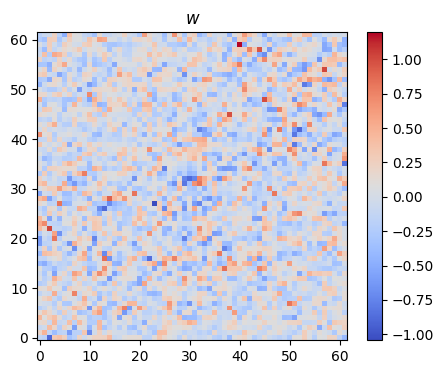

In [ ]:
# Plot
X, Y = np.meshgrid(x, y, indexing='ij')
thyme = 0

plt.figure(figsize=(5,4))
pcm = plt.pcolormesh(X, Y, W[:,:,thyme], cmap='coolwarm')
plt.title('$w$')
plt.colorbar(pcm)

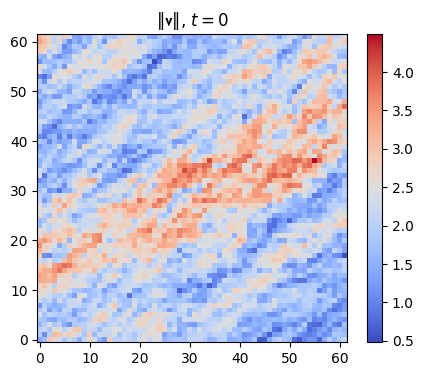

In [ ]:
# # MAKE A MOVIE

# import matplotlib.animation as animation

# # Set up the figure and axis
# fig, ax = plt.subplots(figsize=(5, 4))

# mag = np.sqrt(U**2 + V**2 + W**2)

# # Initialize the plot (using the first time slice for initialization)
# c = ax.pcolormesh(X, Y, mag[:,:,0], cmap='coolwarm', shading='auto')
# ax.set_title(f'$\|𝘃\|$, $t=${thyme}')
# plt.colorbar(c, ax=ax)

# # Update function for the animation
# def update(thyme):
#     ax.clear()  # Clear the current plot
#     c = ax.pcolormesh(X, Y, mag[:,:,thyme], cmap='coolwarm', shading='auto')
#     ax.set_title(f'$\|𝘃\|$, $t=${thyme}')
#     c.set_clim(vmin=np.min(mag[:,:,thyme]), vmax=np.max(mag[:,:,thyme]))
#     return c

# # Create the animation (frames are the range of time steps)
# ani = animation.FuncAnimation(fig, update, frames=T.shape[2], interval=200)

# # Save the animation as a video file (optional)
# ani.save('wind_speed.mp4', writer='ffmpeg', fps=20, dpi=400)

In [ ]:
# # VELOCITY GRADIENTS

# # Read in the tsv files (skip headers)
# df1 = pd.read_csv('gradu_Q1.tsv', sep='\t', skiprows=1)
# df2 = pd.read_csv('gradu_Q2.tsv', sep='\t', skiprows=1)
# df3 = pd.read_csv('gradu_Q3.tsv', sep='\t', skiprows=1)
# df4 = pd.read_csv('gradu_Q4.tsv', sep='\t', skiprows=1)

# # Extract relevant data columns and convert to a NumPy array
# U1 = df1[['duzdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
# U2 = df2[['duzdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
# U3 = df3[['duzdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()
# U4 = df4[['duzdz']].to_numpy().reshape(Nt, Nx, Ny).transpose()

# # Combine
# U_top = np.concatenate((U1, U2), axis=0)
# U_bot = np.concatenate((U4, U3), axis=0)
# U = np.concatenate((U_top, U_bot), axis=1)

# # Check the output formats
# print(f'Imported array... shape: {U1.shape}')
# print(f'Combined array... shape: {U.shape}')

# # EXPORT AS CSV

# # Reshape the 3D array to 2D, keeping the last dimension intact
# U_flattened = U.reshape(2*Nx*2*Ny, Nt)

# # Create a DataFrame and export to CSV
# df = pd.DataFrame(U_flattened)
# df.to_csv('w_z.csv', index=False, header=False)

Imported array... shape: (31, 31, 100)
Combined array... shape: (62, 62, 100)


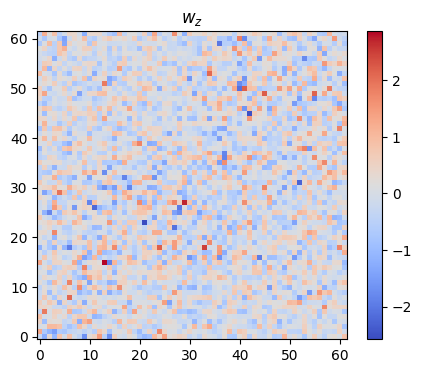

In [ ]:
# Plot
X, Y = np.meshgrid(x, y, indexing='ij')
thyme = 0

plt.figure(figsize=(5,4))
pcm = plt.pcolormesh(X, Y, U[:,:,thyme], cmap='coolwarm')
plt.title('$w_z$')
plt.colorbar(pcm)